World Happiness Report is a data collected through a survey from all over the World. The aim is to study how levels of GDP, life expectancy, generosity, social support, freedom, and corruption contributes to the happiness in a country. 

In this project, we are using World Happiness Report 2022 data to visually analyze what factors make people in a country happy. The dataset can be found [here](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2022). 

We will start by importing the necessary libraries and setting style for our visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Lets have a look at head and tail of the dataset to get an idea of what it looks like.

In [2]:
data = pd.read_csv("World_Happiness_Report_2022.csv")
data.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [3]:
data.tail()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
141,142,Botswana*,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034
145,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005


We can already see that Country names require a little bit of cleaning. Let's explore further.

In [4]:
data.shape

(146, 12)

146 countries are included in the survey

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [6]:
data.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [7]:
data.Country.unique()

array(['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands',
       'Luxembourg*', 'Sweden', 'Norway', 'Israel', 'New Zealand',
       'Austria', 'Australia', 'Ireland', 'Germany', 'Canada',
       'United States', 'United Kingdom', 'Czechia', 'Belgium', 'France',
       'Bahrain', 'Slovenia', 'Costa Rica', 'United Arab Emirates',
       'Saudi Arabia', 'Taiwan Province of China', 'Singapore', 'Romania',
       'Spain', 'Uruguay', 'Italy', 'Kosovo', 'Malta', 'Lithuania',
       'Slovakia', 'Estonia', 'Panama', 'Brazil', 'Guatemala*',
       'Kazakhstan', 'Cyprus', 'Latvia', 'Serbia', 'Chile', 'Nicaragua',
       'Mexico', 'Croatia', 'Poland', 'El Salvador', 'Kuwait*', 'Hungary',
       'Mauritius', 'Uzbekistan', 'Japan', 'Honduras', 'Portugal',
       'Argentina', 'Greece', 'South Korea', 'Philippines', 'Thailand',
       'Moldova', 'Jamaica', 'Kyrgyzstan', 'Belarus*', 'Colombia',
       'Bosnia and Herzegovina', 'Mongolia', 'Dominican Republic',
       'Malaysia', 'Bolivia', 

As seen above, a few countries including Palestine, Hong Kong, and Taiwan have longer names. Let's fix them for our ease and also replace * with an empty string in Country names with asteric in them.

In [8]:
data["Country"].replace("Palestinian Territories","Palestine",inplace = True)
data["Country"].replace("Hong Kong S.A.R. of China","Hong Kong",inplace = True)
data["Country"].replace("Taiwan Province of China","Taiwan",inplace = True)
data["Country"] = data["Country"].str.replace("*","")

<ipython-input-8-edce40be1255>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data["Country"] = data["Country"].str.replace("*","")


Now we are renaming the column names to smaller names

In [9]:
df=data.rename(columns = {'RANK':'Rank', 'Dystopia (1.83) + residual':'Dystopia', 'Explained by: GDP per capita':'GDP per capita', 
                     'Explained by: Social support':'Social support','Explained by: Healthy life expectancy':'Healthy life expectancy',
                        'Explained by: Freedom to make life choices':'Freedom to make life choices', 
                         'Explained by: Generosity':'Generosity', 'Explained by: Perceptions of corruption':'Perceptions of corruption'})


In [10]:
df.head()

,Rank,Country,Happiness score,Whisker-high,Whisker-low,Dystopia,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


Let's have a look at statistics of our dataset using `df.describe()`

In [11]:
df.describe()

,Rank,Happiness score,Whisker-high,Whisker-low,Dystopia,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.290661,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,73.500000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,109.750000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,146.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


Using `sns.pairplot()` to have a look on relationship among variables. There seems to be a strong positive relationship among most of them.

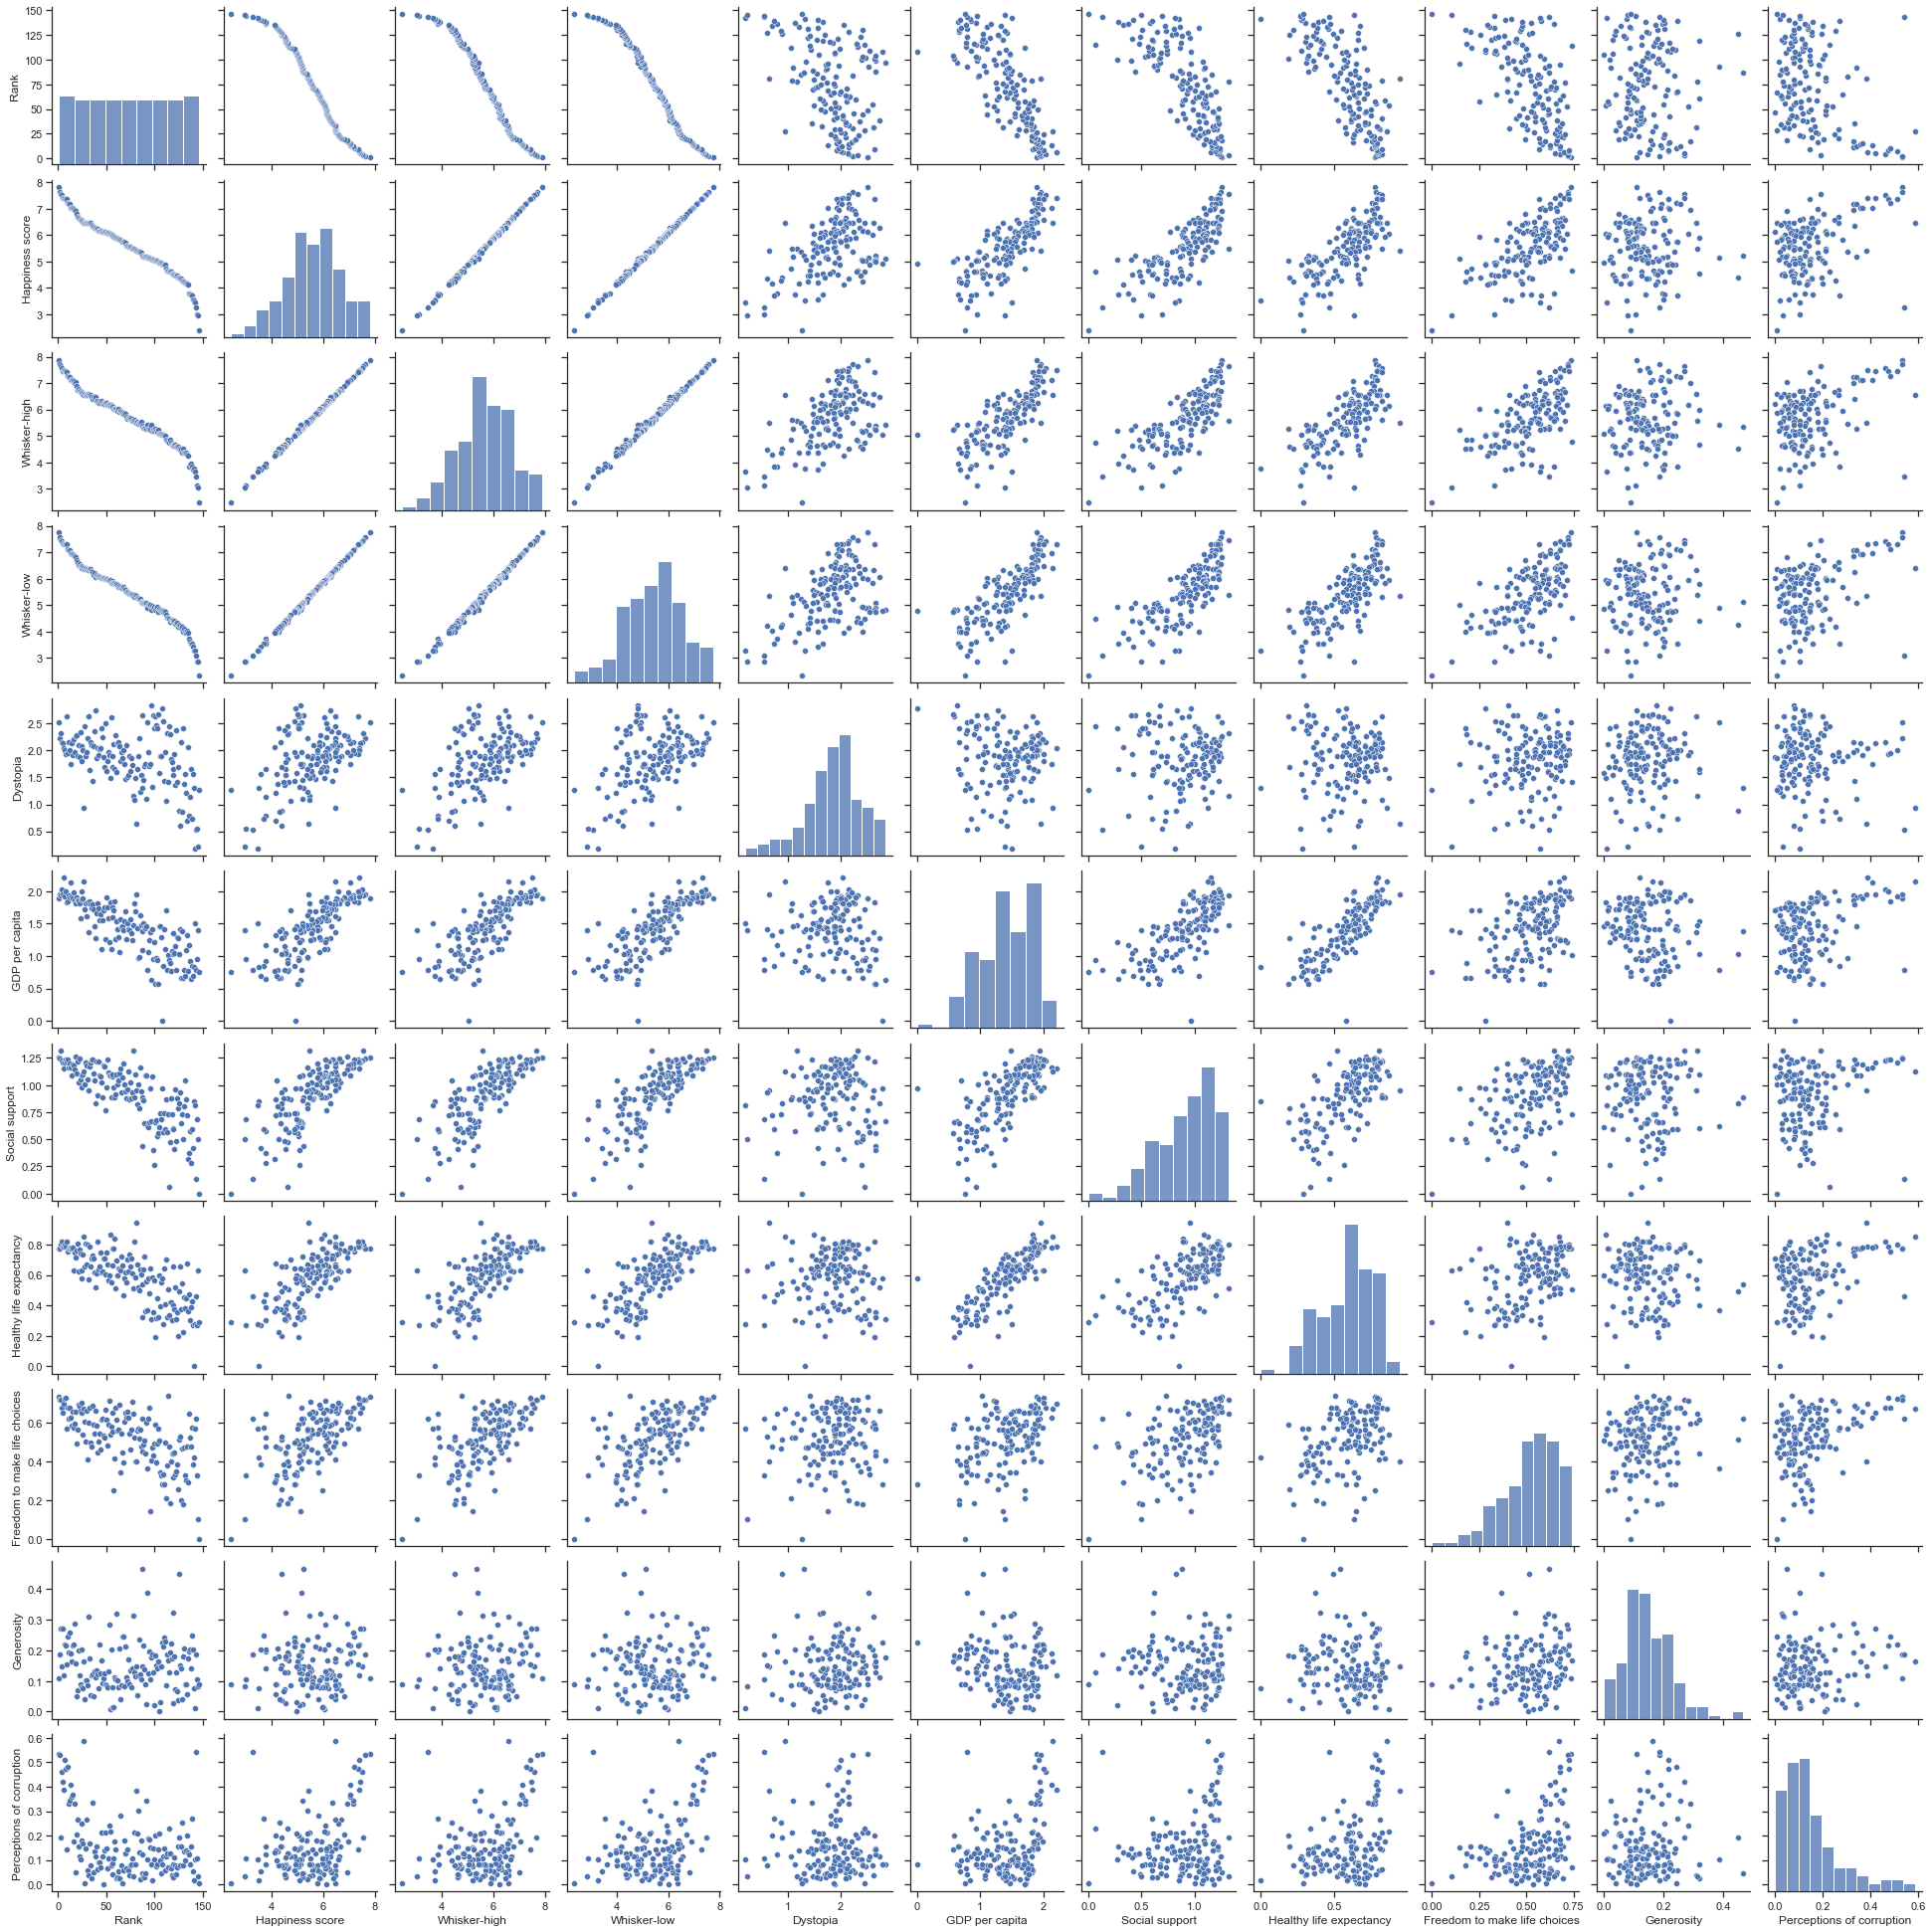

In [12]:
sns.set_theme(style="ticks")
sns.pairplot(df)

Let's plot a heatmap of correlation among variables to have a clearer look on their relationship

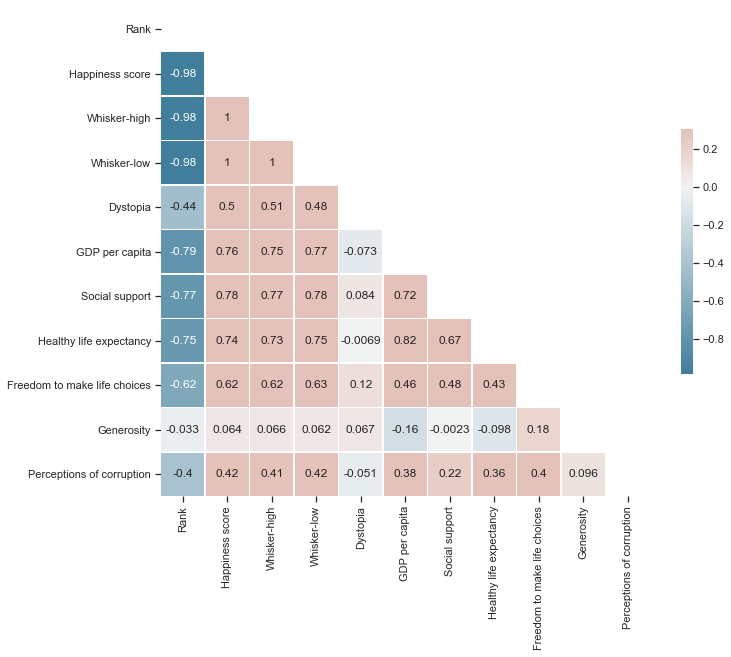

In [13]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

To have a look on top ten happiest countries in the World we make a new dataframe called happiest_countries from our original dataframe 

In [14]:
happiest_countries = df[['Country', 'Happiness score']].sort_values('Happiness score', ascending = False).head(10)
happiest_countries

,Country,Happiness score
0,Finland,7.821
1,Denmark,7.636
2,Iceland,7.557
3,Switzerland,7.512
4,Netherlands,7.415
5,Luxembourg,7.404
6,Sweden,7.384
7,Norway,7.365
8,Israel,7.364
9,New Zealand,7.200


Finland, Denmark, Iceland, Switzerland, Netherlands, Luxembourg, Sweden, Norway, Isreal, and Newzealand are clearly the top happiest counttries in the World. Follow along to explore what makes them the happiest.

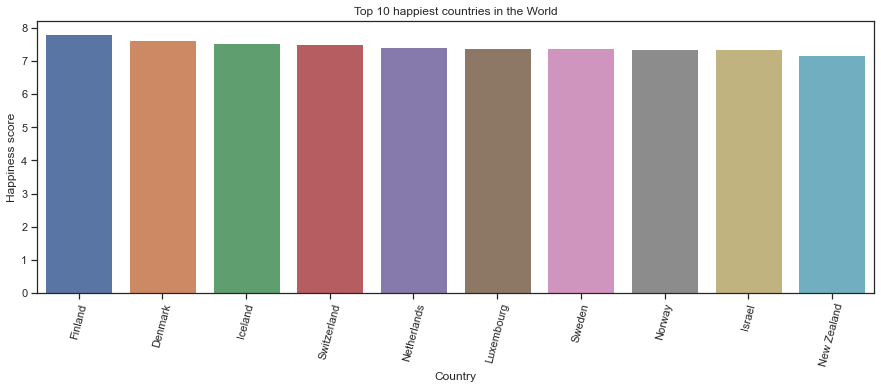

In [15]:
plt.figure(figsize=(15, 5))

plt.title('Top 10 happiest countries in the World')
plt.xticks(rotation=75)
sns.barplot(x=happiest_countries['Country'], y=happiest_countries['Happiness score']);

Creating a seperate dataframe for each factor in order to plot them later

In [16]:
highest_gdp = df[['Country', 'GDP per capita', 'Happiness score']].sort_values('GDP per capita', ascending=False).head(10)
highest_social_support = df[['Country', 'Social support', 'Happiness score']].sort_values('Social support', ascending=False).head(10)
life_exp = df[['Country', 'Happiness score', 'Healthy life expectancy']].sort_values('Healthy life expectancy', ascending=False).head(10)
freedom = df[['Country', 'Happiness score', 'Freedom to make life choices']].sort_values('Freedom to make life choices', ascending=False).head(10)
gen = df[['Country', 'Happiness score', 'Generosity']].sort_values('Generosity', ascending=False).head(10)
corruption = df[['Country', 'Happiness score', 'Perceptions of corruption']].sort_values('Perceptions of corruption', ascending=False).head(10)

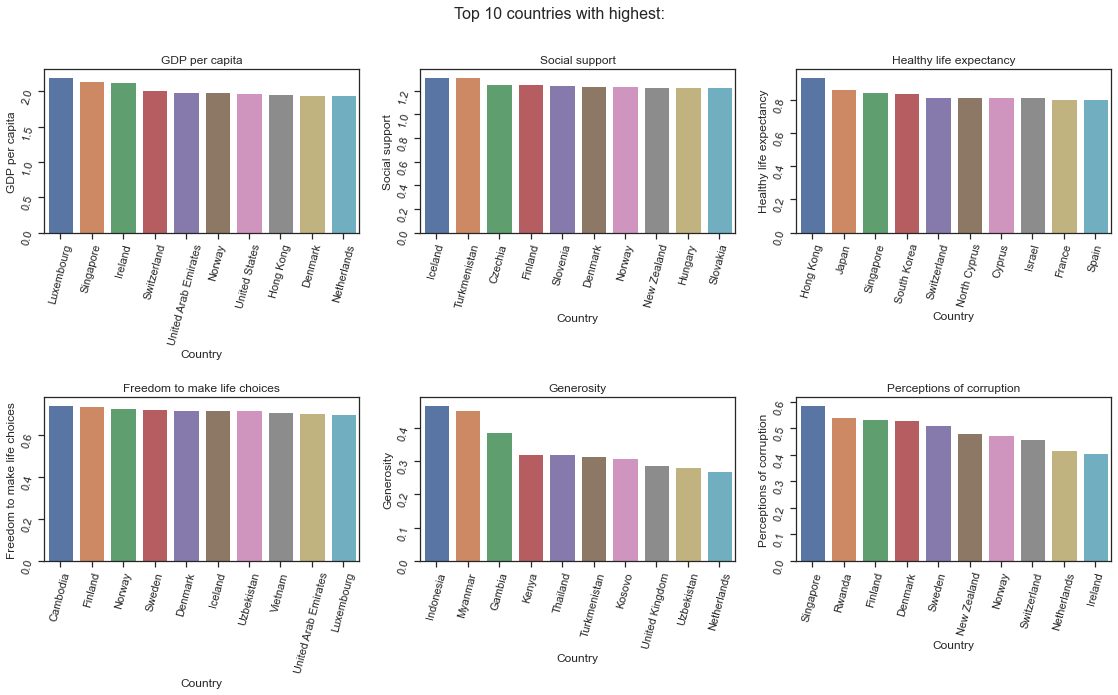

In [17]:

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Top 10 countries with highest:', fontsize=16)
# Use the axes for plotting
axes[0,0].set_title('GDP per capita')
axes[0,0].tick_params(labelrotation=75)
sns.barplot(x=highest_gdp['Country'], y=highest_gdp['GDP per capita'], ax=axes[0,0]);


# Pass the axes into seaborn
axes[0,1].set_title('Social support')
axes[0,1].tick_params(labelrotation=75)
sns.barplot(x=highest_social_support['Country'], y=highest_social_support['Social support'], ax=axes[0,1]);


# Use the axes for plotting
axes[0,2].set_title('Healthy life expectancy')
axes[0,2].tick_params(labelrotation=75)
sns.barplot(x=life_exp['Country'], y=life_exp['Healthy life expectancy'], ax=axes[0,2]);


# Pass the axes into seaborn
axes[1,0].set_title('Freedom to make life choices')
axes[1,0].tick_params(labelrotation=75)
sns.barplot(x=freedom['Country'], y=freedom['Freedom to make life choices'], ax=axes[1,0]);


# Pass the axes into seaborn
axes[1,1].set_title('Generosity')
axes[1,1].tick_params(labelrotation=75)
sns.barplot(x=gen['Country'], y=gen['Generosity'], ax=axes[1,1]);


# Plot an image using the axes
axes[1,2].set_title('Perceptions of corruption')
axes[1,2].tick_params(labelrotation=75)
sns.barplot(x=corruption['Country'], y=corruption['Perceptions of corruption'], ax=axes[1,2]);

plt.tight_layout(pad=2);

Top 10 countries in all the factors vary. However, the thing to notice is that there are countries among all the factors that were absent in happiest countries plot. Maybe try some other way to identify what makes people in a country happy. But before that, let's have a look on least happy countries

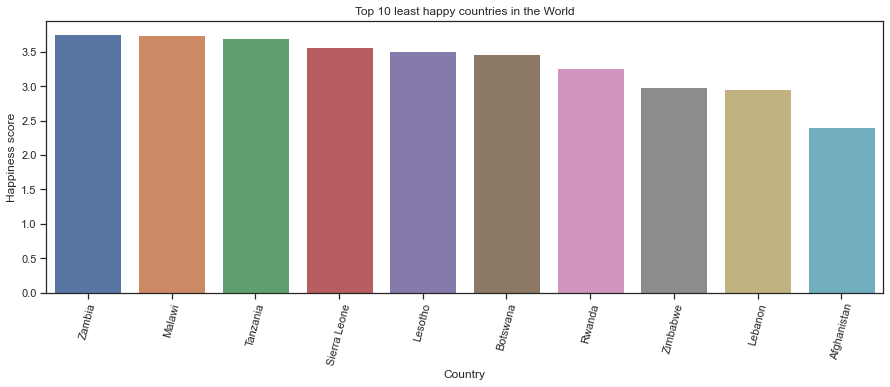

In [18]:
plt.figure(figsize=(15, 5))

least_happy = df[['Country', 'Happiness score']].sort_values('Happiness score', ascending = False).tail(10)
plt.title('Top 10 least happy countries in the World')
plt.xticks(rotation=75)
sns.barplot(x=least_happy['Country'], y=least_happy['Happiness score']);

Zambia, Matawi, Tanzania, Sierra Leone, Lesotho, Botswana, Rwanda, Zimbabwe, Lebanon, and Afghanistan are the least happy countries.

In [19]:
lowest_gdp = df[['Country', 'GDP per capita', 'Happiness score']].sort_values('GDP per capita', ascending=False).tail(10)
lowest_social_support = df[['Country', 'Social support', 'Happiness score']].sort_values('Social support', ascending=False).tail(10)
life_exp = df[['Country', 'Happiness score', 'Healthy life expectancy']].sort_values('Healthy life expectancy', ascending=False).tail(10)
freedom = df[['Country', 'Happiness score', 'Freedom to make life choices']].sort_values('Freedom to make life choices', ascending=False).tail(10)
gen = df[['Country', 'Happiness score', 'Generosity']].sort_values('Generosity', ascending=False).tail(10)
corruption = df[['Country', 'Happiness score', 'Perceptions of corruption']].sort_values('Perceptions of corruption', ascending=False).tail(10)

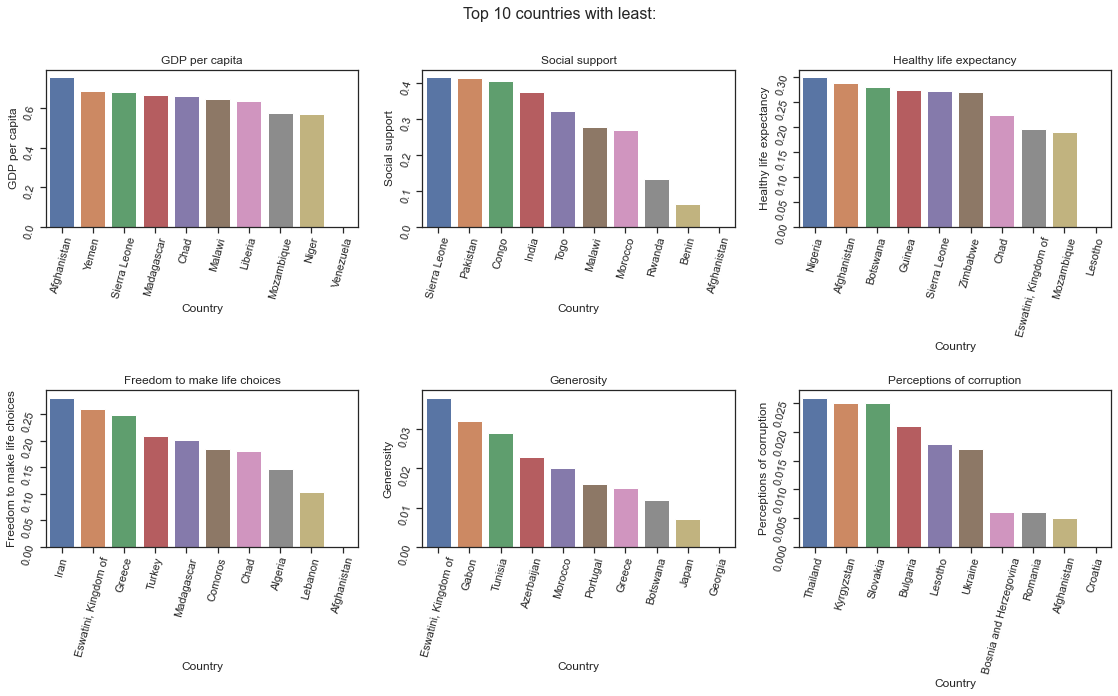

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Top 10 countries with least:', fontsize=16)
# Use the axes for plotting
axes[0,0].set_title('GDP per capita')
axes[0,0].tick_params(labelrotation=75)
sns.barplot(x=lowest_gdp['Country'], y=lowest_gdp['GDP per capita'], ax=axes[0,0]);


# Pass the axes into seaborn
axes[0,1].set_title('Social support')
axes[0,1].tick_params(labelrotation=75)
sns.barplot(x=lowest_social_support['Country'], y=lowest_social_support['Social support'], ax=axes[0,1]);


# Use the axes for plotting
axes[0,2].set_title('Healthy life expectancy')
axes[0,2].tick_params(labelrotation=75)
sns.barplot(x=life_exp['Country'], y=life_exp['Healthy life expectancy'], ax=axes[0,2]);


# Pass the axes into seaborn
axes[1,0].set_title('Freedom to make life choices')
axes[1,0].tick_params(labelrotation=75)
sns.barplot(x=freedom['Country'], y=freedom['Freedom to make life choices'], ax=axes[1,0]);


# Pass the axes into seaborn
axes[1,1].set_title('Generosity')
axes[1,1].tick_params(labelrotation=75)
sns.barplot(x=gen['Country'], y=gen['Generosity'], ax=axes[1,1]);


# Plot an image using the axes
axes[1,2].set_title('Perceptions of corruption')
axes[1,2].tick_params(labelrotation=75)
sns.barplot(x=corruption['Country'], y=corruption['Perceptions of corruption'], ax=axes[1,2]);

plt.tight_layout(pad=2);

Afghanistan being the least happy country has also least freedom to make life choices and social support but highest GDP per capita among the least happy countries. Again, we can see some other countries in all these plots therefore, have a look at scatter plots of all the factors against happiness score. 

C:\Users\Tooba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Happiness score', ylabel='Perceptions of corruption'>

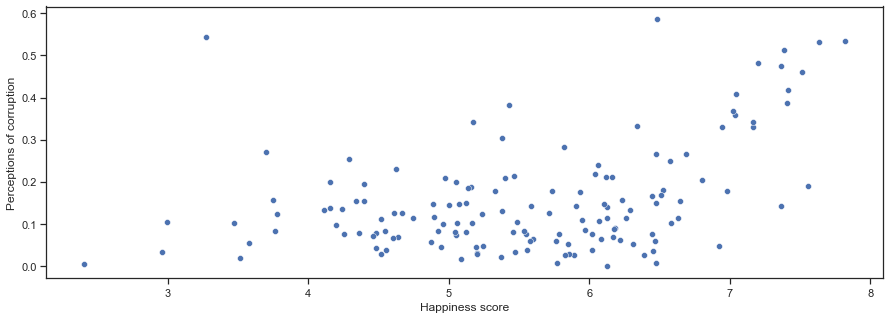

In [21]:
plt.figure(figsize=(15, 5))

sns.scatterplot(df['Happiness score'], df['Perceptions of corruption'])

It's clearly visible that countries with highest corruption are least happy. However, the relationship does'nt seem too strong as it can also be seen in the correlation heatmap above that correlation between happiness score and perceptions of corruption is 42%.

C:\Users\Tooba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Happiness score', ylabel='Generosity'>

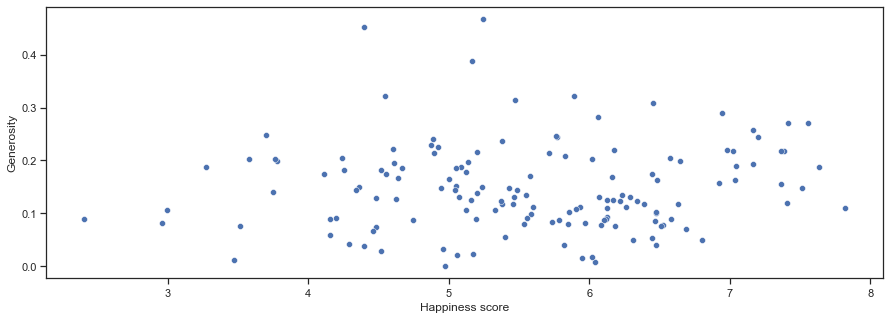

In [22]:
plt.figure(figsize=(15, 5))

sns.scatterplot(df['Happiness score'], df['Generosity'])

The correlation above says that the correlation between happiness score and happiness is only 6.4% which can also be seen in the above plot. One thing that can be inferred from it is that maybe, the happiest countries have the least proportion of population that's needy and hence they are not in the most generous nations.

C:\Users\Tooba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Happiness score', ylabel='GDP per capita'>

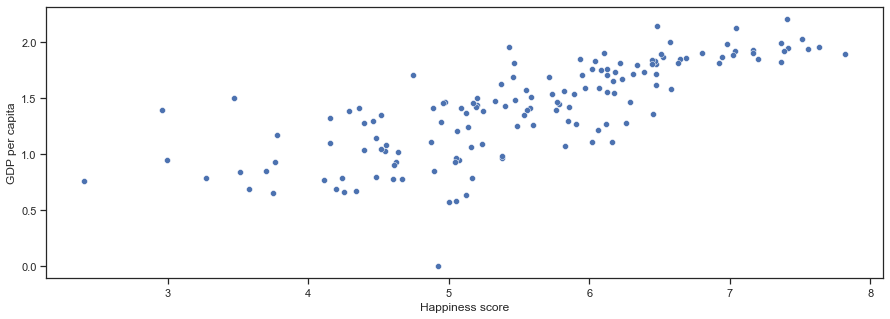

In [23]:
plt.figure(figsize=(15, 5))

sns.scatterplot(df['Happiness score'], df['GDP per capita'])

GDP per capita contributes 76% to the happiness score of a country and hence the plot shows strong positive relation

C:\Users\Tooba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Happiness score', ylabel='Social support'>

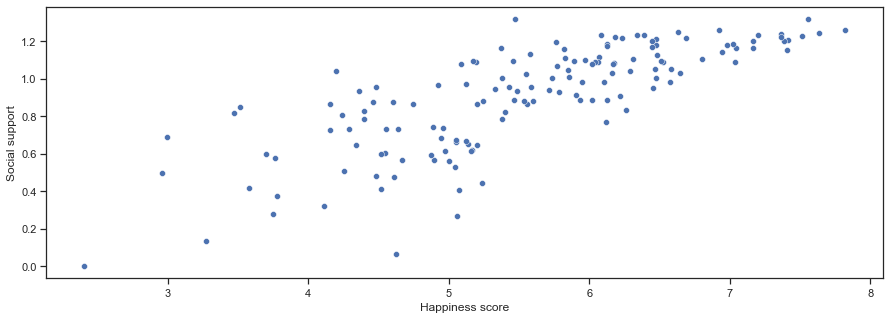

In [24]:
plt.figure(figsize=(15, 5))

sns.scatterplot(df['Happiness score'], df['Social support'])

Strong positive relationship between social support and happiness score of 78%

C:\Users\Tooba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Happiness score', ylabel='Healthy life expectancy'>

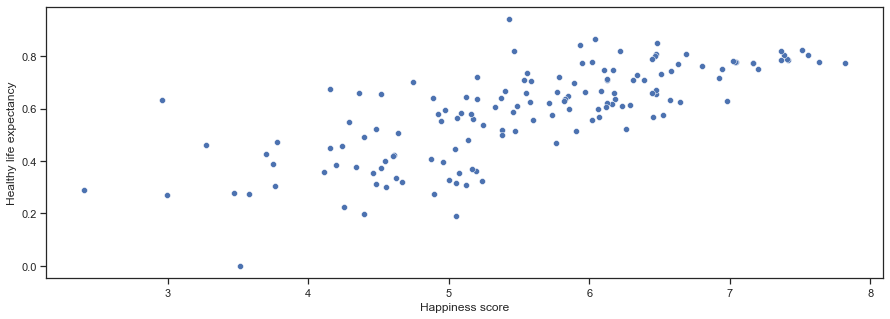

In [25]:
plt.figure(figsize=(15, 5))

sns.scatterplot(df['Happiness score'], df['Healthy life expectancy'])

High correlation of 74% between healthy life expectancy and happiness score is clearly visible in the above plot as well

C:\Users\Tooba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Happiness score', ylabel='Freedom to make life choices'>

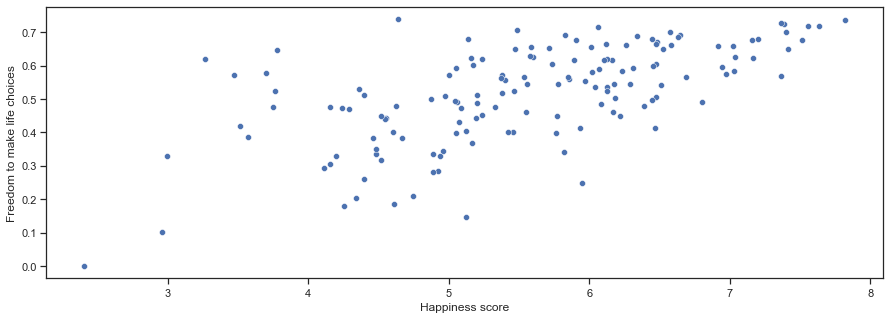

In [26]:
plt.figure(figsize=(15, 5))

sns.scatterplot(df['Happiness score'], df['Freedom to make life choices'])

Freedom to make life choices also have strong impact on happiness score of a country but less than the other factors such as social support, life expectancy and social support. The correlation is 62%.

C:\Users\Tooba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tooba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tooba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tooba\anacond

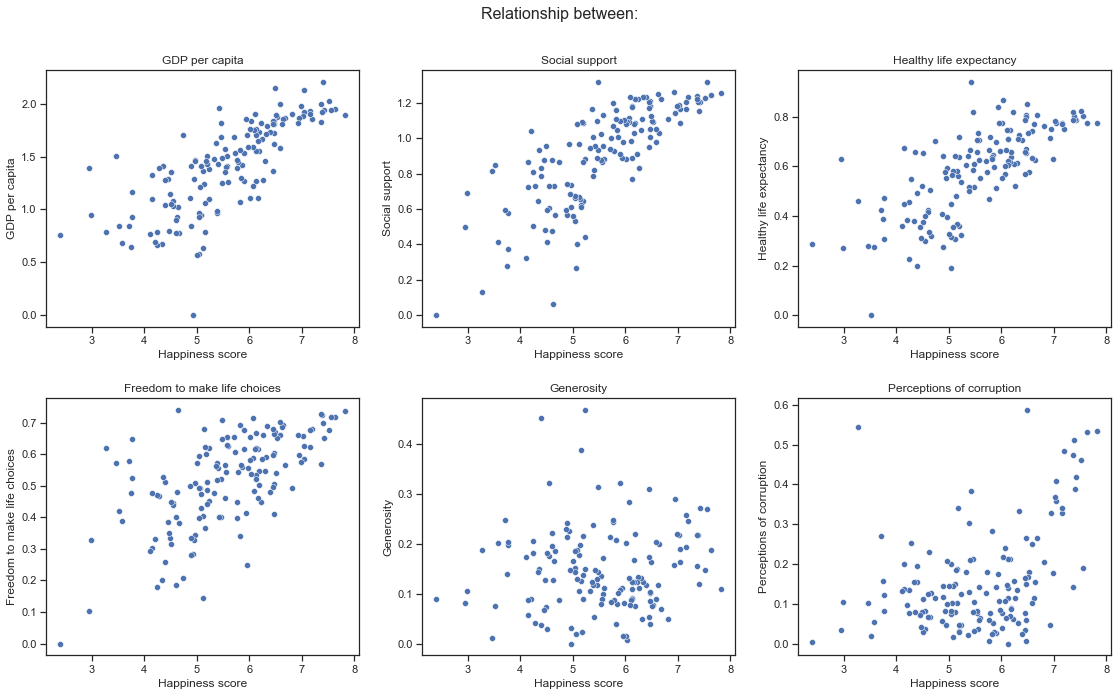

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Relationship between:', fontsize=16)
# Use the axes for plotting
axes[0,0].set_title('GDP per capita')
sns.scatterplot(df['Happiness score'], df['GDP per capita'], ax=axes[0,0]);


# Pass the axes into seaborn
axes[0,1].set_title('Social support')
sns.scatterplot(df['Happiness score'], df['Social support'], ax=axes[0,1]);


# Use the axes for plotting
axes[0,2].set_title('Healthy life expectancy')
sns.scatterplot(df['Happiness score'], df['Healthy life expectancy'], ax=axes[0,2]);


# Pass the axes into seaborn
axes[1,0].set_title('Freedom to make life choices')
sns.scatterplot(df['Happiness score'], df['Freedom to make life choices'], ax=axes[1,0]);


# Pass the axes into seaborn
axes[1,1].set_title('Generosity')
sns.scatterplot(df['Happiness score'], df['Generosity'], ax=axes[1,1]);


# Plot an image using the axes
axes[1,2].set_title('Perceptions of corruption')
sns.scatterplot(df['Happiness score'], df['Perceptions of corruption'], ax=axes[1,2])

plt.tight_layout(pad=2);

The above plot shows the relationship between happiness score and all the factors in one figure for ease of the audience to compare

## Conclusion

GDP per capita, Social support, Healthy life expectancy, and Freedom to make life choices has the highest impact on the happiness of countries in the World. Hence, top happiest countries can be seen among the top ten countries in all these factors. Generosity and Perceptions of corruption seem to be important factors but the data speaks that the happiest countries might have higher perceptions of corruption. 